# <h2><span style="color:#2ecc71"><strong><span style="font-family:Verdana,Geneva,sans-serif">Sobre este experimento...</span></strong></span></h2> 

La reducción básica (RB) es una técnica matemática que se utiliza para comprimir un número a un número más pequeño. Se realiza modificando las cifras de un número hasta reducirlo a un módulo de la base utilizada. Por ejemplo, si se utiliza la base 10, el objetivo sería reducir el número a un número entre 0 y 9. Si se utiliza la base 3, el objetivo sería reducirlo a un número entre 0 y 2.

En términos geométricos, la RB puede ser vista como una proyección en un espacio con una base particular. Por ejemplo, en la base 10, los números se proyectan en un espacio con una base de 10 dimensiones. La RB se realiza proyectando los números en un espacio con una base menor y tomando el resto de la proyección modulo la base.

# <h1> <span style="color:#8e44ad"><span style="font-family:sans-serif">1 - Formalizaci&oacute;n del experimento</span></span></h1>

- 1.1 - Definición del operador
- 1.2 - Cálculo de la sucesión
- 1.3 - Definición de las sucesiones
    - 1.3.1 - Generación mediante cálculo
    - 1.3.2 - Obtención mediante dataset

## 1.1 - Definición del operador RB

Este es el operador de reduccion a base (RB):  
Se define como RB(n, m), donde RB es el operador, n el numero, y m el metodo
Consiste en dado un numero, obtener la reduccion de ese numero aplicando una suma de sus cifras hasta dejarlo en el rango de numeros perteneciente a la base. Se asume base 10 aunque se podria definir para cualquier base.

- Se puede definir para la suma y para la resta
- Se puede definir tanto para enteros como flotantes

Ej: 

- RB(15, +) = 1 + 5 = 6 
- RB(19, +) = 1 + 9 = 10 = 1 + 0 = 1
- RB(19, -) = 1 - 9 = - 8 = -8 + 9 = 1




### 1.1.1 - Operador +RB_10 (Suma)

In [4]:
def rb_10_addition(n):

    # Suma los dígitos del numero
    n = sum(int(i) for i in str(n))

    # Reduccion a la base 10
    while n > 9:
        n = sum(int(i) for i in str(n))

    return int(n)

In [5]:
rb_10_addition(123456789)

9

In [6]:
for i in range(0, 10):
    print(rb_10_addition(i), end=', ')

print()
for i in range(10, 20):
    print(rb_10_addition(i), end=', ')

print()
for i in range(20, 30):
    print(rb_10_addition(i), end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 
2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 

### 1.1.2 - Operador -RB_10 (Resta)

In [7]:
def rb_10_subtraction(n):

    rb = 0
    first = True

    # Iteramos sobre los dígitos del número
    for i in str(n):

        # Si es el primer dígito, lo asignamos a rb
        if first:
            rb = int(i)
            first = False
            continue

        rb -= int(i)

        while rb < 0:
            rb += 9
    
    return rb


In [8]:
for i in range(0, 10):
    print(rb_10_subtraction(i), end=', ')

print()
for i in range(10, 20):
    print(rb_10_subtraction(i), end=', ')

print()
for i in range(20, 30):
    print(rb_10_subtraction(i), end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 
2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 

### 1.1.3 - Operador generico

In [9]:
def RB_10(n, method):
       
    # Si el metodo es +, sumamos los dígitos del número
    if method == "+":
        return rb_10_addition(n)
    
    # Si el metodo es -, restamos los dígitos del número
    elif method == "-":
        return rb_10_subtraction(n)
            

In [10]:
print(RB_10(15, "+"))  # Output: 6
print(RB_10(15, "-"))  # Output: 5

print(RB_10(123, "+"))  # Output: 6
print(RB_10(123, "-"))  # Output: 5

print(RB_10(1234, "+"))  # Output: 1
print(RB_10(1234, "-"))  # Output: 1

print(RB_10(19, "+"))
print(RB_10(19, "-"))

6
5
6
5
1
1
1
1


## 1.2 - Cálculo de la sucesion

Implementamos una funcion para calcular la sucesion 

In [11]:
def an_k(a, n, k, a_args=None):
    """
    Funcion que calcula una sucecion de numeros a partir de una funcion a
    
    Parametros
    ----------
    a: funcion
        Funcion que calcula el valor de la sucecion
        
    n: int
        Valor inicial de la sucecion

    k: int
        Numero de elementos de la sucecion
        
    a_args: tuple
        Argumentos de la funcion a
        
    Returns
    -------
    
    k_list: list
        Lista con los k elementos de la sucecion      
    
    """
    
    k_list = []
    
    if a_args is None:
        for i in range(k):
            an = a(n)
            k_list.append(an)
            n+=1
    else:
        for i in range(k):
            an = a(n, a_args)
            k_list.append(an)
            n+=1
        
    return k_list


In [12]:
def n_mas_uno(n):
    return n+1

In [13]:
an_k(n_mas_uno, 0, 10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## 1.3 - Definicion de las sucesiones a explorar

### 1.3.1 - Generación mediante cálculo

In [14]:
import operator
from functools import reduce

#### Producto de cifras

In [15]:

def producto(n:int):
    """
    Funcion que calcula el producto de los digitos de un numero

    Args:
        n (int): Numero entero

    Returns:
        int: Producto de los digitos del numero
    """

    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))
    # Calcular el producto de los dígitos
    product = reduce(operator.mul, digits)

    return product

Test de la sucesión

In [16]:
an_k(producto, 0, 25)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8]

In [17]:
an_k(producto, 25, 20)

[10, 12, 14, 16, 18, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 0, 4, 8, 12, 16]

Test de la sucesion bajo el operador RB_10

In [18]:
n = 1231
method = "+"
print("producto(" + str(n) + "):", producto(n), "->", "RB_10(" + str(producto(n)) + ", " + method + ") =", RB_10(producto(n), method))

n = 229
method = "-"
print("producto(" + str(n) + "):", producto(n), "->", "RB_10(" + str(producto(n)) + ", " + method + ") =", RB_10(producto(n), method))

producto(1231): 6 -> RB_10(6, +) = 6
producto(229): 36 -> RB_10(36, -) = 6


#### Exponenciacion de cifras

In [19]:
def exp_k(n:int, args:list):
    """
    Función que toma un número entero n, obtiene sus digitos y los eleva a la k-ésima potencia
    
    Args:
        n (int): Numero entero
        k (int): Potencia a la que se elevaran los digitos del numero (primer elemento de la lista args)
        
        
    Returns:
        int: Numero entero
    """
    
    k = args[0]
    
    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))

    # Elevar cada dígito al cuadrado
    digits = [d**k for d in digits]

    # Convertir la lista de dígitos en un número
    z = int("".join(map(str, digits)))
    
    return z

Test de la sucesión

In [20]:
an_k(exp_k, 0, 10, [2])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [21]:
an_k(exp_k, 0, 10, [3])

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

Test del operador

In [22]:
n = 1231
k = 0
method = "+"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------

n = 222
k = 2
method = "+"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------


n = 99
k = 7
method = "-"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------


exp_k(1231, [0]): 1111 -> RB_10(1111, +) = 4
exp_k(222, [2]): 444 -> RB_10(444, +) = 3
exp_k(99, [7]): 47829694782969 -> RB_10(47829694782969, -) = 8


#### Numeros primos

In [23]:
def n_primo(n: int):
    """
    Función que toma un número entero n y devuelve el n-ésimo número primo. aplica el operador de reducción a la base 10.

    Params:
        n: int, entero del cual se calculará el n-ésimo número primo.

    Return:
        n-ésimo número primo con reducción a la base 10.
    """


    if n == 1:
        return 2
    if n == 2:
        return 3
    if n == 3:
        return 5
    if n == 4:
        return 7
    if n == 5:
        return 11 # 11
    if n == 6:
        return 13 # 13   

    primes = [2, 3, 5, 7, 11, 13]  # los primeros 6 primos
    num = 14  # siguiente número a evaluar
    prime_count = 6  # contador de números primos encontrados

    while prime_count < n:
        for p in primes:
            if num % p == 0:
                break
        else:
            prime_count += 1
            if prime_count == n:
                return num
        num += 1

In [24]:
an_k(n_primo, 1, 10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [25]:
# Testeamos la función de los primos

for i in range(1, 10):
    print("n_primo(" + str(i) + ") ->", n_primo(i), end=", ")

n_primo(1) -> 2, n_primo(2) -> 3, n_primo(3) -> 5, n_primo(4) -> 7, n_primo(5) -> 11, n_primo(6) -> 13, n_primo(7) -> 17, n_primo(8) -> 19, n_primo(9) -> 23, 

#### Fibonacci

In [26]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [27]:
an_k(fibonacci, 0, 10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

#### Otras

In [28]:
def n_catalan(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        res = 0
        for i in range(n):
            res += n_catalan(i) * n_catalan(n-i-1)
        return res


In [29]:
an_k(n_catalan, 0, 10)

[0, 1, 0, 1, 0, 2, 0, 5, 0, 14]

In [30]:
print("20 primeros de proucto de cifras:", an_k(producto, 0, 20))
print("20 primeros de potencia de cifras: exp = 2", an_k(exp_k, 0, 20, [2]))
print("20 primeros de potencia de cifras: exp = 3", an_k(exp_k, 0, 20, [3]))

20 primeros de proucto de cifras: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 primeros de potencia de cifras: exp = 2 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 10, 11, 14, 19, 116, 125, 136, 149, 164, 181]
20 primeros de potencia de cifras: exp = 3 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 10, 11, 18, 127, 164, 1125, 1216, 1343, 1512, 1729]


### 1.3.2 - Obtención mediante dataset

#### Fibonacci

In [31]:
# Leer csv de datos de fibonacci
import pandas as pd
df = pd.read_csv('datasets/fibonacci_sequence.csv')
df.head()

,Iteration,Value
0,0,0
1,1,1
2,2,1
3,3,2
4,4,3


In [32]:
# Funcion que obtiene fibonacci de n de la lista de datos
def dataset_fibonacci(n):
    return int(df['Value'][n])

# Testeamos la funcion
print("dataset_fibonacci(0) = ", dataset_fibonacci(0))
print("dataset_fibonacci(1) = ", dataset_fibonacci(1))
print("dataset_fibonacci(2) = ", dataset_fibonacci(2))
print("dataset_fibonacci(3) = ", dataset_fibonacci(3))
print("dataset_fibonacci(23) = ", dataset_fibonacci(23))

dataset_fibonacci(0) =  0
dataset_fibonacci(1) =  1
dataset_fibonacci(2) =  1
dataset_fibonacci(3) =  2
dataset_fibonacci(23) =  28657


#### PI

In [33]:
# Generar un dataset con los digitos de numero PI

# Leer txt de datos de PI
with open('datasets/pi.txt', 'r') as file:
    data = file.read().replace('\n', '')

# Funcion que obtiene los digitos de PI de n de la lista de datos
def dataset_pi(n):
    return int(data[n]) 

# Testeamos la funcion
print("dataset_pi(0) = ", dataset_pi(0))
print("dataset_pi(1) = ", dataset_pi(1))
print("dataset_pi(2) = ", dataset_pi(2))
print("dataset_pi(3) = ", dataset_pi(3))
print("dataset_pi(4) = ", dataset_pi(4))


dataset_pi(0) =  3
dataset_pi(1) =  1
dataset_pi(2) =  4
dataset_pi(3) =  1
dataset_pi(4) =  5


# <h1><span style="color:#8e44ad"><span style="font-family:Arial,Helvetica,sans-serif">2 - Visualizacion de los datos</span></span></h1>

- 2.1 - Representacion matricial
- 2.2 - Supermatrices
- 2.3 - Representación gráfica
    - 2.3.1 - Manejo del color
    - 2.3.2 - Generación de imagenes
    - 2.3.3 - Tecnicas de visusalizacion
    - 2.3.3 - Ejemplo de funcionamiento

## 2.1 - Representación matricial

Definimos una funcion para generar una representacion matricial de los datos

In [34]:

def gen_matrix(a, method, n_i, w, h, a_args=None):
    """
    Funcion que toma un número entero n_i, un ancho w y un alto h y devuelve una lista de listas con los números de la sucesión.

    Params:
        a:función, función que calcula los números de la sucesión.
        method:str, método de reducción a la base 10.
        n_i:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        w:int, ancho
        h:int, alto

    Return:
        lista de listas con los números de la sucesión.

    """ 

    data_list = []
    for i in range(h):
        if a_args is None:
            k_list = an_k(a, n_i, w)
        else:
            k_list = an_k(a, n_i, w, a_args)
        
        for j in range(len(k_list)):
            k_list[j] = RB_10(k_list[j], method)
        
        data_list.append(k_list)
        n_i += w

    return data_list


   

Probamos la funcion:


- Creamos una matriz de 10x10

In [35]:
# Configuracion de la sucesion
# --------------------------------

n_0 = 0                 # Termino inicial de la sucesion
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# --------------------------------

gen_matrix(producto, "+", n_0, w, h)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 3, 5, 7, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 4, 8, 3, 7, 2, 6, 1, 5, 9],
 [0, 5, 1, 6, 2, 7, 3, 8, 4, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 7, 5, 3, 1, 8, 6, 4, 2, 9],
 [0, 8, 7, 6, 5, 4, 3, 2, 1, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [36]:
gen_matrix(producto, "-", n_0, w, h)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 8, 6, 4, 2],
 [0, 3, 6, 9, 8, 5, 2, 1, 7, 4],
 [0, 4, 8, 8, 4, 2, 7, 3, 1, 6],
 [0, 5, 1, 5, 2, 6, 3, 7, 4, 8],
 [0, 6, 8, 2, 7, 3, 6, 2, 5, 1],
 [0, 7, 6, 1, 3, 7, 2, 4, 8, 3],
 [0, 8, 4, 7, 1, 4, 5, 8, 2, 5],
 [0, 9, 2, 4, 6, 8, 1, 3, 5, 7]]

## 2.2 - Supermatrices

Una vez visto como podemos crear clusters, podemos crear una matiz de matrices (Supermatriz), considerando cada matriz un elemento, de esta forma:

- Una matriz de matrices de 10x10 estara compuesta por 100 matrices


<p><span style="color: #00ff00;"><strong>La visualizacion de la Supermatriz, nos da indicio de que existe cierta simetria para algunas sucesiones cuando aplicamos el operador RB (Reduccion a la Base)</strong> </span></p>

Para facilitar el proceso de visualizacion, se procede a codificar con un color cada valor posible (0-9).

La implementacion de esta funcionalidad esta basada en crear una lista de clusters del tamaño equivalente a la dimension de matriz deseada (h*w)

Cada cluster de la lista se codificara en una imagen de las mismas dimensiones que la matriz, y los clusters se iran concatenando en la imagen de izquierda a derecha y de arriba a abajo. (Notese que esto es experimental y no es ninguna regla, se podria implementar multiples variaciones, lo que daria lugar a simetrias con distinto eje, pero simetrias igualmente)

In [37]:
def gen_matrix_list(a, method: str, n_0: int, w: int, h: int, count: int, offset:int, a_args=None) -> list[list[int]]:
    """
    Funcion que toma un número entero n_0, un número entero count y un número entero offset y devuelve una lista de listas de listas con los números de la sucesión.

    Params:
        n_0: int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        count: int, cantidad de clusters
        offset: int, offset entre clusters

    Return:
        lista de listas de listas con los números de la sucesión.

    """ 

    cluster = []
    for i in range(count):
        if a_args is None:
            data_list = gen_matrix(a, method, n_0, w, h)
        else:
            data_list = gen_matrix(a, method, n_0, w, h, a_args)
        cluster.append(data_list)
        n_0 += offset

    return cluster


Crear lista de 100 matrices:


- Como termino inicial de la sucesion, definimos n_0
- Como ancho de matriz w
- Como alto de matriz h



In [38]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto            # Funcion que calcula los numeros de la sucesion
method = "+"            # Metodo de reduccion a la base 10
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho de la matriz
h = 10                  # Alto de la matriz

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la supermatriz
m_h = 10                # Alto de la supermatriz
offset = h*w            # Offset entre matrices (distancia entre matrices)

# Configuracion de la lista de matrices
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de matrices
# --------------------------------
matrix_0_to_99 = gen_matrix_list(a, "+", n_0, w, h, cluster_count, offset)

In [39]:
matrix_0_to_99[1]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 3, 5, 7, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 4, 8, 3, 7, 2, 6, 1, 5, 9],
 [0, 5, 1, 6, 2, 7, 3, 8, 4, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 7, 5, 3, 1, 8, 6, 4, 2, 9],
 [0, 8, 7, 6, 5, 4, 3, 2, 1, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [40]:
matrix_0_to_99[3]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [41]:
print("Supermatriz de matrices: ")
print("--------------------------")
print("Numero de matrices: ", len(matrix_0_to_99))
print("Numero de filas por matriz: ", len(matrix_0_to_99[0]))
print("Numero de columnas por matriz: ", len(matrix_0_to_99[0][0]))

Supermatriz de matrices: 
--------------------------
Numero de matrices:  100
Numero de filas por matriz:  10
Numero de columnas por matriz:  10


## 2.3 - Representación grafica

La representacion grafica puede implementarse usando distintas tecnicas.
Siguiendo con la estructura matricial, vamos a representar los datos como una supermatriz en la que cada dato esta cofificado mediante un color

### 2.3.1 - Manejo del color

#### Blanco y negro

In [42]:

def number_to_gray(number):
    gray = int((255/9) * number)
    return (gray, gray, gray)


In [43]:
# generamos una lista de colores en blanco y negro usando la funcion number_to_gray
gray_list = []
for i in range(10):
    gray_list.append(number_to_gray(i))

print(gray_list)

[(0, 0, 0), (28, 28, 28), (56, 56, 56), (85, 85, 85), (113, 113, 113), (141, 141, 141), (170, 170, 170), (198, 198, 198), (226, 226, 226), (255, 255, 255)]


#### A color

Podemos definir tambien distintas paletas de color

In [44]:
default_colors = {
    0: (0, 0, 0),         # black
    1: (255, 0, 0),      # red
    2: (255, 128, 0),    # orange
    3: (255, 255, 0),    # yellow
    4: (0, 255, 0),      # green
    5: (0, 255, 255),    # cyan
    6: (0, 0, 255),      # blue
    7: (128, 0, 255),    # purple
    8: (255, 0, 255),    # magenta
    9: (255, 255, 255)  # white
}

neon_colors = {
    1: (255, 127, 0),     # neon orange
    2: (255, 0, 255),     # neon pink
    3: (0, 255, 0),       # neon green
    4: (0, 255, 255),     # neon cyan
    5: (255, 0, 0),       # neon red
    6: (255, 165, 0),     # neon yellow
    7: (0, 0, 255),       # neon blue
    8: (255, 192, 203),   # neon pink
    9: (173, 255, 47),    # neon green
    0: (138, 43, 226)     # neon blue
}

blues = {
    0: (0, 0, 0),         # black
    1: (51, 153, 255),    # baby blue
    2: (102, 255, 255),   # light blue
    3: (0, 153, 153),     # teal
    4: (0, 153, 255),     # steel blue
    5: (0, 255, 255),     # cyan
    6: (0, 0, 255),       # blue
    7: (102, 0, 153),     # dark blue
    8: (255, 0, 204),     # electric blue
    9: (255, 255, 255)    # white
}



In [45]:
def number_to_color(number, palette=default_colors):
    return palette[number]


In [46]:
number_to_color(5, default_colors)

(0, 255, 255)

### 2.3.2 - Generación de la imagen

Usamos la libreria Pillow

In [47]:
%pip install Pillow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Definimos una funcion para generar la imagen de la matriz

In [48]:
from PIL import Image
from IPython.display import display

def create_matrix_image(data, scale=1, paint_function=number_to_color, palette=None):
    width = len(data[0])
    height = len(data)

    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()
    for i, row in enumerate(data):
        for j, number in enumerate(row):
            if palette is None:
                color = paint_function(number)
            else:
                color = paint_function(number, palette)
            for x in range(scale):
                for y in range(scale):
                    pixels[j*scale+x, i*scale+y] = color
    return image

Definimos una funcion para generar la imagen de la supermatriz

In [49]:
# Creamos una imagen global a partir de la lista de sublistas de clusters
# ----------------------------------------------------------------------

def create_supermatrix_image(supermatrix, scale=1, paint_function=number_to_color):

    w = len(supermatrix[0][0][0])
    h = len(supermatrix[0][0])

    width = w * len(supermatrix[0])
    height = h * len(supermatrix)

    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()

    for i, row in enumerate(supermatrix):
        for j, cluster in enumerate(row):
            for x, row in enumerate(cluster):
                for y, number in enumerate(row):
                    color = paint_function(number)
                    for a in range(scale):
                        for b in range(scale):
                            pixels[j*w*scale+y*scale+b, i*h*scale+x*scale+a] = color

    return image


### 2.3.3 - Técnicas de visualización

Representacion de un histograma de proporcion de aparicion de elementos

In [50]:
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
import numpy as np


def plot_info(img, tittle, size, color_dict):

    img = np.array(img)

    # Contar la cantidad de aparición de cada color
    color_counts = defaultdict(int)
    for row in img:
        for pixel in row:
            color_counts[tuple(pixel)] += 1

    # Calcular el porcentaje de aparición de cada color
    total_pixels = img.shape[0] * img.shape[1]
    color_percentages = {}
    for color, count in color_counts.items():
        if color in color_dict.values():
            color_percentages[color] = count / total_pixels * 100

    # Crear un diccionario con las claves de color_dict y los valores de color_percentages, si no existe el color en color_percentages se asigna 0
    color_percentages =  {digit: color_percentages.get(color, 0)
                            for digit, color in color_dict.items()}

    # Convertir los colores de la imagen a RGB
    color_dict = {digit: tuple(np.array(color) / 255)
                  for digit, color in color_dict.items()}

    # Crear la figura
    fig, ax = plt.subplots(1, 2, figsize=size)

    # Añadir la imagen
    ax[0].imshow(img)

    # Añadir el titulo a la imagen
    ax[0].set_title(tittle)

    # Añadir una leyenda para cada color
    bars = ax[1].bar(
        list(color_dict.keys()),
        list(color_percentages.values()),
        color=list(color_dict.values()),
        edgecolor='black',
        linewidth=3,
        width=0.5
    )

    ax[1].set_facecolor('#b5c1f5')
    ax[1].set_title("Color Distribution %")
    ax[1].set_xlabel("Color")

    # Añadir el porcentaje de aparición de cada color
    for i, bar in enumerate(bars):

        color = list(color_dict.values())[i]
        ax[1].text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.5,
            str(round(bar.get_height(), 2)) + '%',
            ha='center',
            color='black',
            fontsize=8,
            fontweight='bold'
        )

        # Añadir el color de cada barra
        bar.set_color(color)

        # Añadir el numero del color de cada barra
        bar.set_label(list(color_dict.keys())[i])

    # Añadir la leyenda
    ax[1].legend(
        loc='center left',          # Ubicacion de la leyenda
        bbox_to_anchor=(1, 0.5),    # Ubicacion de la leyenda
        edgecolor='black',          # Color del borde de la leyenda
        facecolor='white',          # Color del fondo de la leyenda
        framealpha=0.5,               # Transparencia del fondo de la leyenda
        shadow=True,                # Sombra de la leyenda
        borderpad=1                 # Espacio entre el borde de la leyenda y el texto
    )

    # Mostrar la figura
    plt.show()


### 2.3.4 - Ejemplo de funcionamiento

#### Matrices

Podemos controlar el operador a la hora de generar la sucesión

Fibonacci +RB_10
[0, 1, 1, 2, 3, 5, 8, 4, 3, 7]
[1, 8, 9, 8, 8, 7, 6, 4, 1, 5]
[6, 2, 8, 1, 9, 1, 1, 2, 3, 5]
[8, 4, 3, 7, 1, 8, 9, 8, 8, 7]
[6, 4, 1, 5, 6, 2, 8, 1, 9, 1]
[1, 2, 3, 5, 8, 4, 3, 7, 1, 8]
[9, 8, 8, 7, 6, 4, 1, 5, 6, 2]
[8, 1, 9, 1, 1, 2, 3, 5, 8, 4]
[3, 7, 1, 8, 9, 8, 8, 7, 6, 4]
[1, 5, 6, 2, 8, 1, 9, 1, 1, 2]


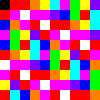

Fibonacci -RB_10
[0, 1, 1, 2, 3, 5, 8, 7, 1, 8]
[0, 8, 2, 5, 7, 5, 3, 7, 3, 3]
[6, 0, 3, 3, 8, 4, 1, 0, 3, 5]
[8, 7, 1, 8, 0, 1, 2, 5, 7, 5]
[5, 7, 3, 3, 8, 0, 3, 3, 8, 4]
[1, 2, 3, 5, 8, 7, 1, 8, 0, 1]
[2, 5, 0, 5, 5, 7, 3, 3, 8, 0]
[3, 5, 8, 6, 1, 2, 3, 5, 8, 7]
[1, 8, 2, 1, 2, 5, 0, 5, 5, 7]
[3, 3, 8, 0, 3, 5, 1, 6, 1, 2]


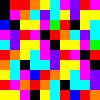

In [51]:
# Generamos una matriz de 10x10 empleando la sucesion de Fibonacci +RB_10
# ----------------------------------------------------------------

f_rb10add = gen_matrix(dataset_fibonacci, "+", 0, 10, 10)

print("Fibonacci +RB_10")
for row in f_rb10add:
    print(row)

image = create_matrix_image(f_rb10add, scale=10, paint_function=number_to_color)
display(image)


# Generamos una matriz de 10x10 empleando la sucesion de Fibonacci -RB_10
# ----------------------------------------------------------------

f_rb10sub = gen_matrix(dataset_fibonacci, "-", 0, 10, 10)

print("Fibonacci -RB_10")
for row in f_rb10sub:
    print(row)

image = create_matrix_image(f_rb10sub, scale=10, paint_function=number_to_color)
display(image)


Podemos controlar el tamaño de la imagen

Scale: 10
Palette: default_colors


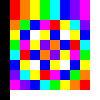

In [52]:
print("Scale:", 10)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color)
display(image)

Scale: 5
Palette: default_colors


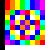

In [53]:
print("Scale:", 5)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=5, paint_function=number_to_color, palette=default_colors)
display(image)

Scale: 15
Palette: default_colors


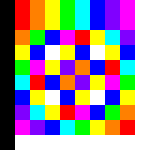

In [54]:
print("Scale:", 15)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=15, paint_function=number_to_color, palette=default_colors)
display(image)

Podemos usar distintas paletas

Scale: 10
Palette: blues


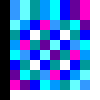

In [55]:
print("Scale:", 10)
print("Palette:", "blues")

image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color, palette=blues)
display(image)

O representarlo en blanco y negro

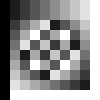

In [56]:
image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_gray)
display(image)

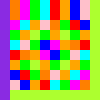

In [57]:
image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color, palette=neon_colors)
display(image)

Podemos generar imagenes para cualquier sucesión

Podemos generar distintos tamaños de matriz

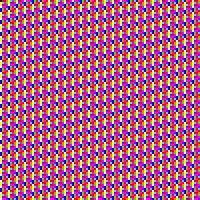

In [58]:
fibonacci_matrix = gen_matrix(dataset_fibonacci, "+", 0, 100, 100)

image = create_matrix_image(fibonacci_matrix, scale=2, paint_function=number_to_color)
display(image)

Podemos usar las sucesiones que necesitan mas parametros pasandoselos en forma de tupla usando el parámetro a_args

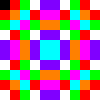

In [59]:
# Generamos una matriz de 10x10 empleando la sucesion de exp_k (n^k) con k = 2
# ----------------------------------------------------------------

function_extra_args = (2,)      # La potencia de la sucesion exp_k (n^k) es 2 (n^2)

exp_k2 = gen_matrix(exp_k, "+", 0, 10, 10, a_args=function_extra_args)
image = create_matrix_image(exp_k2, scale=10, paint_function=number_to_color)
display(image)


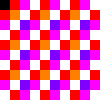

In [60]:
# Generamos una matriz de 10x10 empleando la sucesion de exp_k (n^k) con k = 3
# ----------------------------------------------------------------

function_extra_args = (3,)      # La potencia de la sucesion exp_k (n^k) es 2 (n^2)

exp_k2 = gen_matrix(exp_k, "+", 0, 10, 10, a_args=function_extra_args)
image = create_matrix_image(exp_k2, scale=10, paint_function=number_to_color)
display(image)


In [61]:
# plot_info(image, "exp_k, k=3 +", (13, 5), default_colors)

#### Supermatrices

La generacion de imagenes de supermatrices esta basada en la concatenacion de las imagenes individuales de cada submatriz

In [62]:
def build_supermatrix(clusters_wide, clusters_high, clusters):
    cluster_matrix = []
    for i in range(clusters_high):
        row = []
        for j in range(clusters_wide):
            row.append(clusters[i*clusters_wide + j])
        cluster_matrix.append(row)
    return cluster_matrix

Probamos la generacion

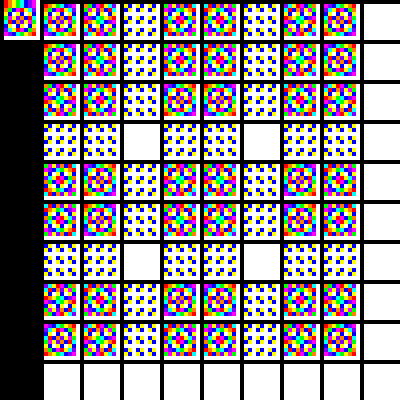

In [63]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto            # Funcion que calcula los numeros de la sucesion
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la matriz de clusters
m_h = 10                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = gen_matrix_list(a, "+", n_0, w, h, cluster_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_supermatrix(m_w, m_h, clusters)

# Imagen global
create_supermatrix_image(
    cluster_matrix, 
    scale=4,
    paint_function=number_to_color
)

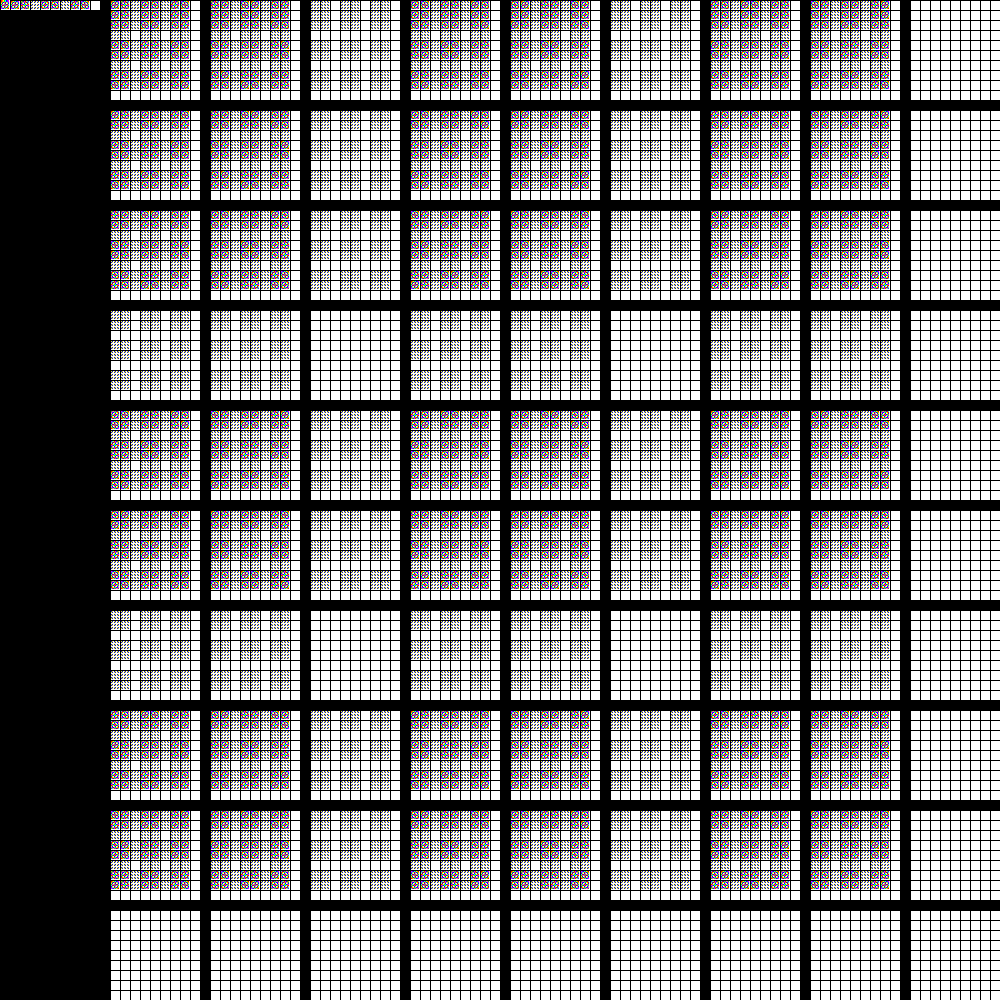

In [64]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto          # Funcion que calcula los numeros de la sucesion
method = "+"          # Metodo de generacion de la sucesion
n_0 = 0                 # Termino inicial de la sucesion


# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 100                # Ancho de la matriz de clusters
m_h = 100                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
matrix_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = gen_matrix_list(a, method, n_0, w, h, matrix_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_supermatrix(m_w, m_h, clusters)

# Imagen global
create_supermatrix_image(
    cluster_matrix, 
    scale=1,
    paint_function=number_to_color
)

Podemos facilitar este proceso mediante la implemntacion de ese codigo en una funcion:

In [65]:
def gen_supermatrix_image(a, method, n_0, w, h, m_w, m_h, scale, paint_function, a_args=None):
    '''
    Crea una imagen de una supermatriz de tamaño m_w x m_h

    Params:
        a: funcion que calcula los numeros de la sucesion
        method: metodo de generacion de la sucesion
        n_0: termino inicial de la sucesion
        w: ancho de la matriz
        h: alto de la matriz
        m_w: ancho de la supermatriz
        m_h: alto de la supermatriz
        scale: escala de la imagen
        paint_function: funcion que pinta los numeros de la matriz
    '''
    offset = w*h
    matrix_count = m_w * m_h
    matrix_list = gen_matrix_list(a, method, n_0, w, h, matrix_count, offset, a_args)
    cluster_matrix = build_supermatrix(m_w, m_h, matrix_list)
    return create_supermatrix_image(cluster_matrix, scale, paint_function)


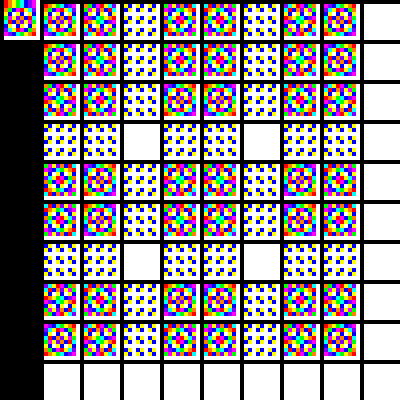

In [66]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

# <h1><span style="color:#8e44ad"><span style="font-family:Arial,Helvetica,sans-serif">3 - Experimentación</span></span></h1>

## 3.1 - Producto de las cifras de un numero

Esta sucesion consiste en la multiplicación de las cifras (digitos) de un numero entre si, y posteriormente usar la reducción a la base

### +RB_10

Supermatriz de la sucesion producto bajo el operador RB_10+

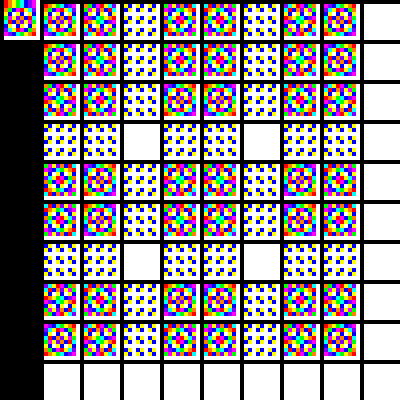

In [67]:
prod_rbplus = gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

display(prod_rbplus)

Supermatriz de la sucesion producto bajo el operador RB_10+ en blanco y negro

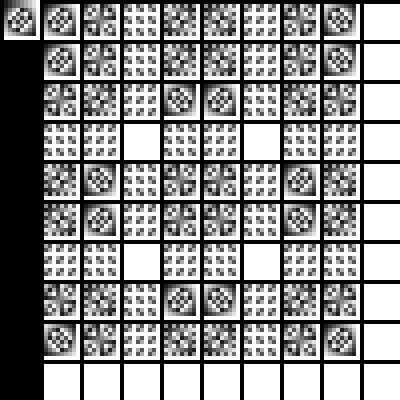

In [68]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray # Funcion que asigna un color a cada numero
)

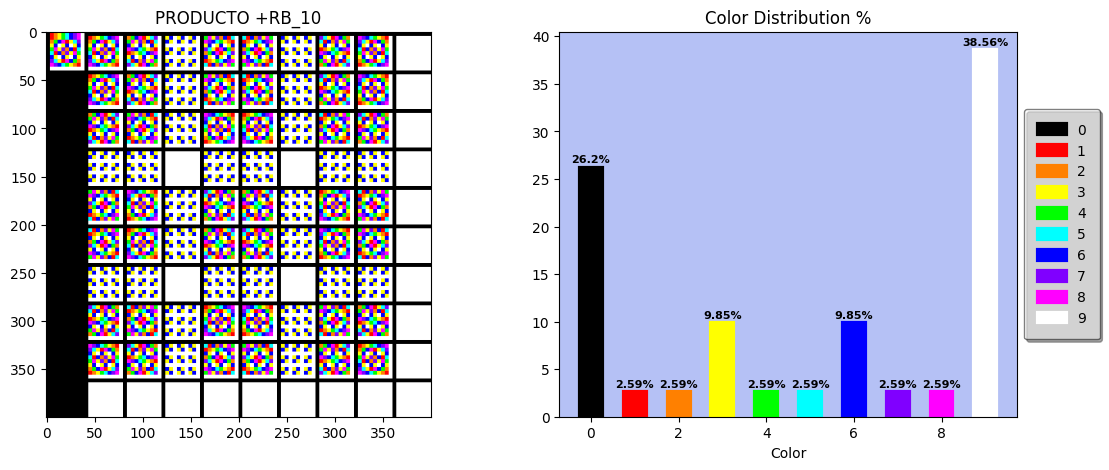

In [69]:
plot_info(prod_rbplus, "PRODUCTO +RB_10", (13, 5), default_colors)

### -RB_10

Supermatriz de la sucesion producto bajo el operador RB_10-

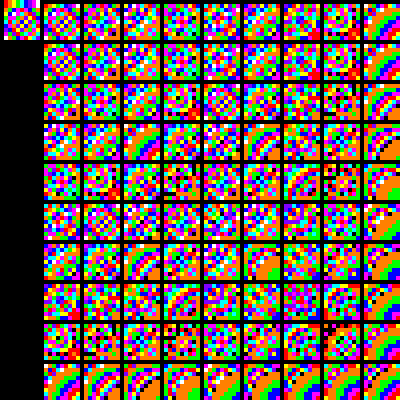

In [70]:
color_img = gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

display(color_img)

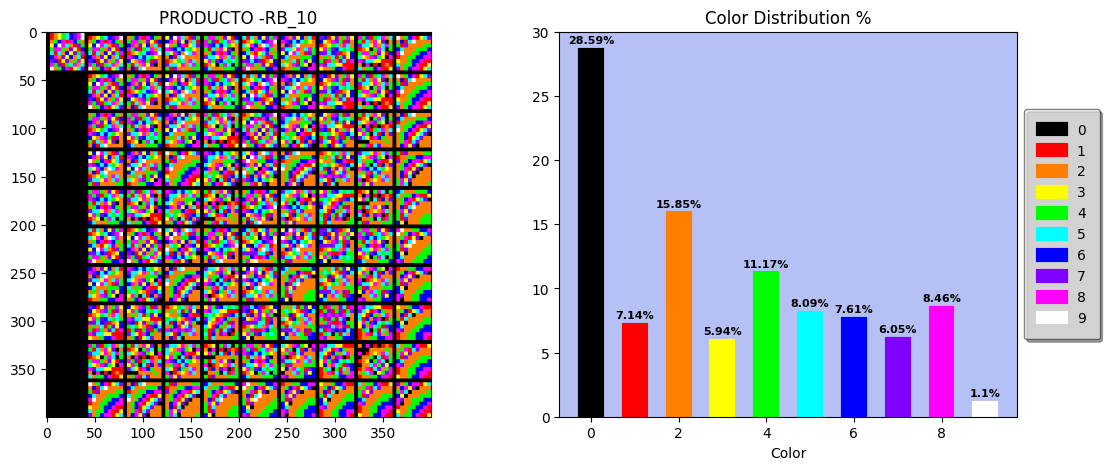

In [71]:
plot_info(color_img, "PRODUCTO -RB_10", (13, 5), default_colors)

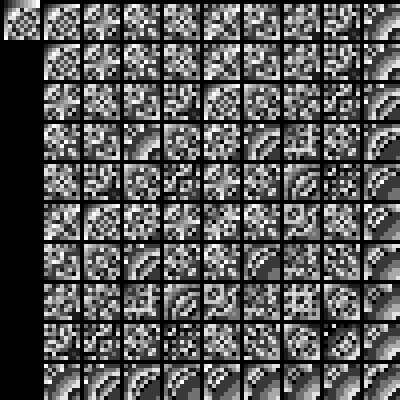

In [72]:
bw_img = gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray # Funcion que asigna un color a cada numero
)

display(bw_img)

## 3.2 - Sucesion n^k

Sucesion de n² en forma de supermatriz de 10x10

In [73]:
exp_2 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

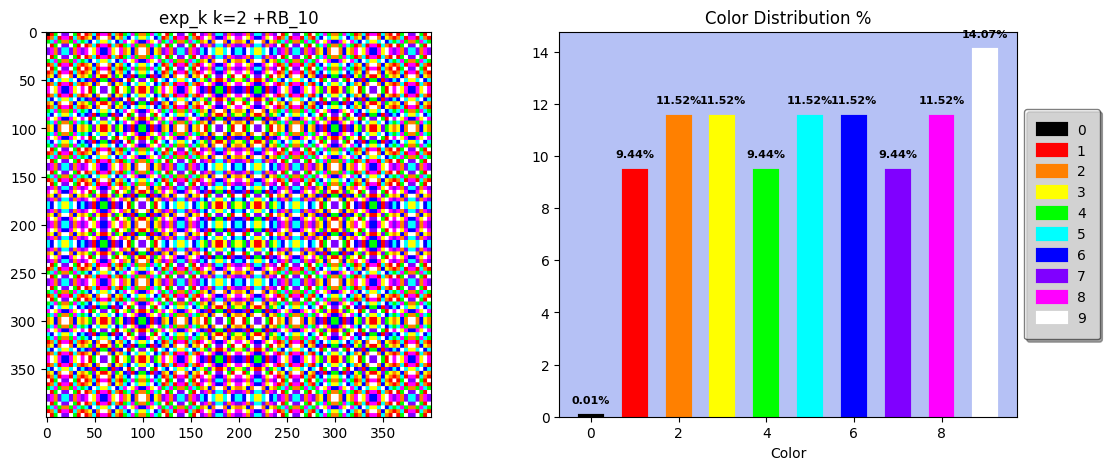

In [74]:
plot_info(exp_2, "exp_k k=2 +RB_10", (13, 5), default_colors)

En blanco y negro

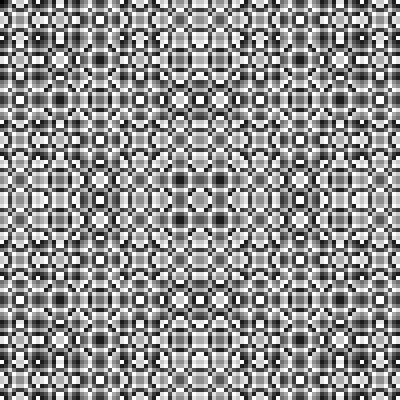

In [75]:
gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

Sucesion de n² en forma de supermatriz de 10x10 con operador de resta

In [76]:
exp_n2less = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

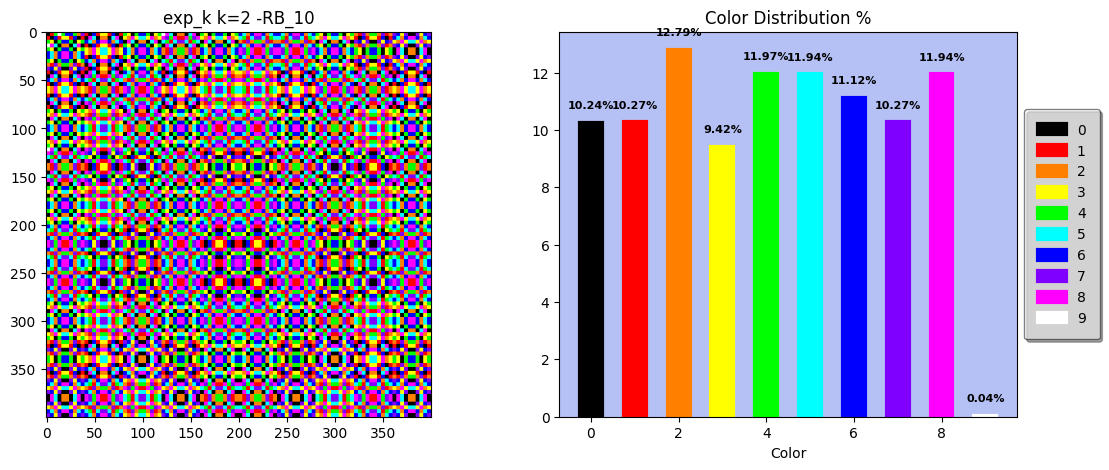

In [77]:
plot_info(exp_n2less, "exp_k k=2 -RB_10", (13, 5), default_colors)

n³ con metodo suma

In [78]:
exp_3 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(3, )    # Argumentos de la funcion a
)


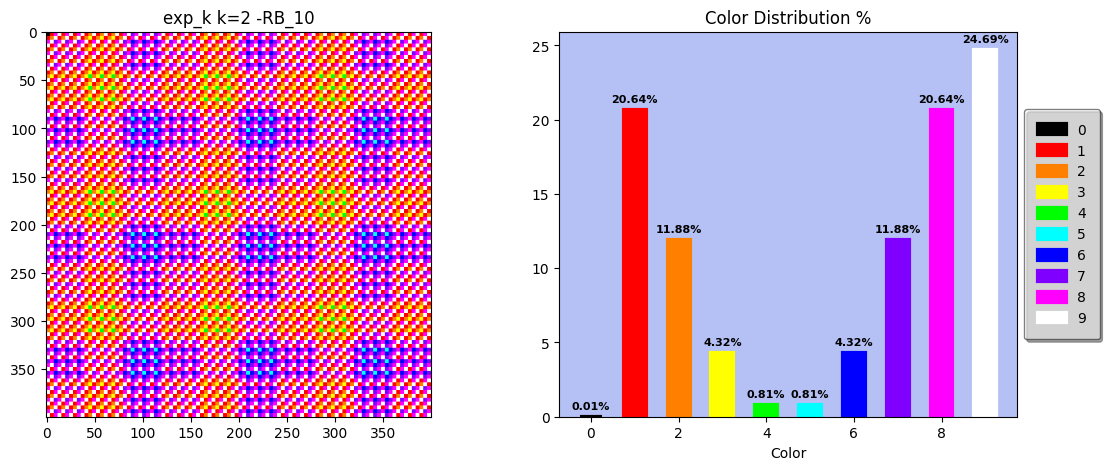

In [79]:
plot_info(exp_3, "exp_k k=2 -RB_10", (13, 5), default_colors)

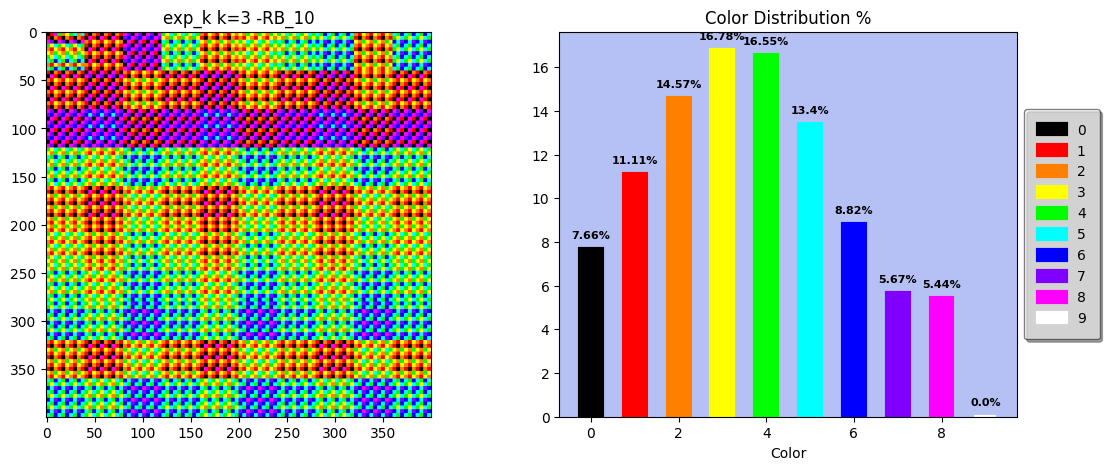

In [80]:
exp_3_less = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(3, )    # Argumentos de la funcion a
)

plot_info(exp_3_less, "exp_k k=3 -RB_10", (13, 5), default_colors)

n⁴

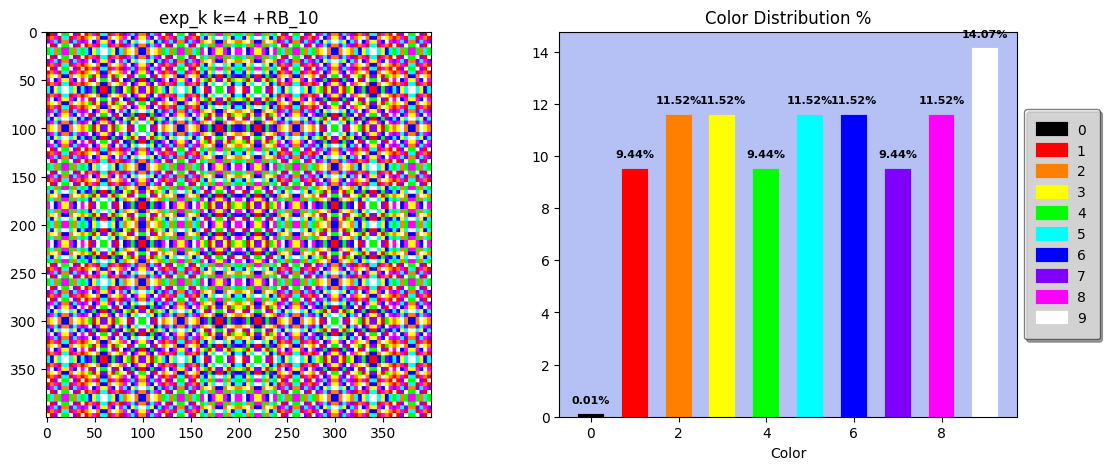

In [81]:
exp_4 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(4, )    # Argumentos de la funcion a
)

plot_info(exp_4, "exp_k k=4 +RB_10", (13, 5), default_colors)

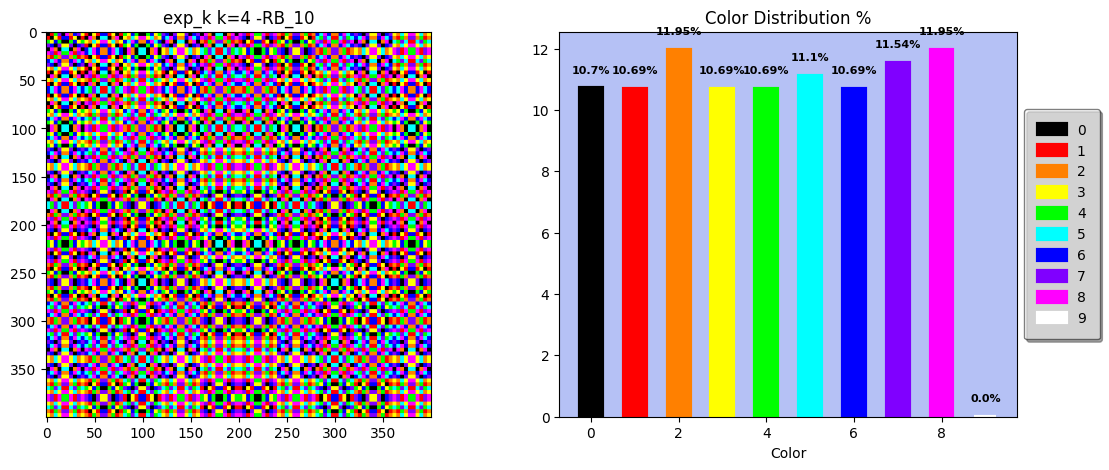

In [82]:
exp_4 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(4, )    # Argumentos de la funcion a
)

plot_info(exp_4, "exp_k k=4 -RB_10", (13, 5), default_colors)

n⁵

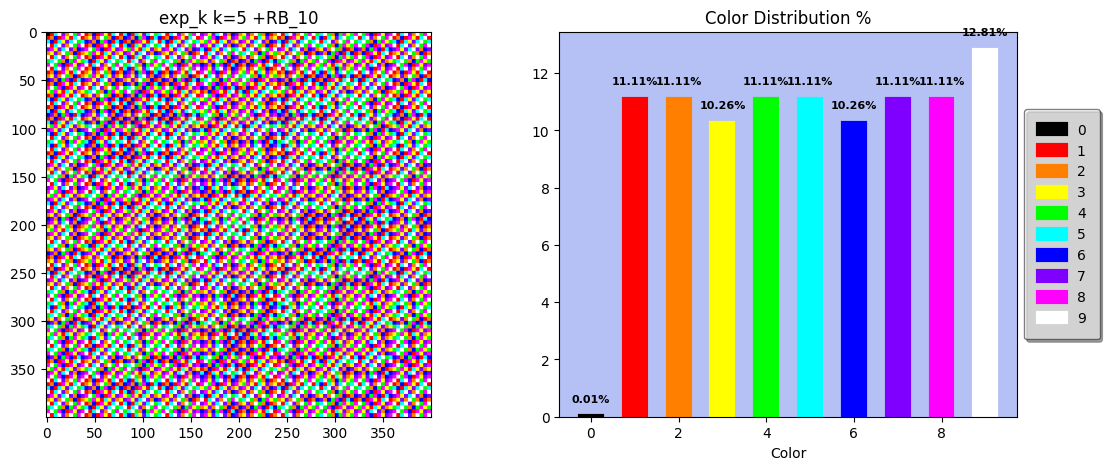

In [83]:
exp_5 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(5, )    # Argumentos de la funcion a
)

plot_info(exp_5, "exp_k k=5 +RB_10", (13, 5), default_colors)

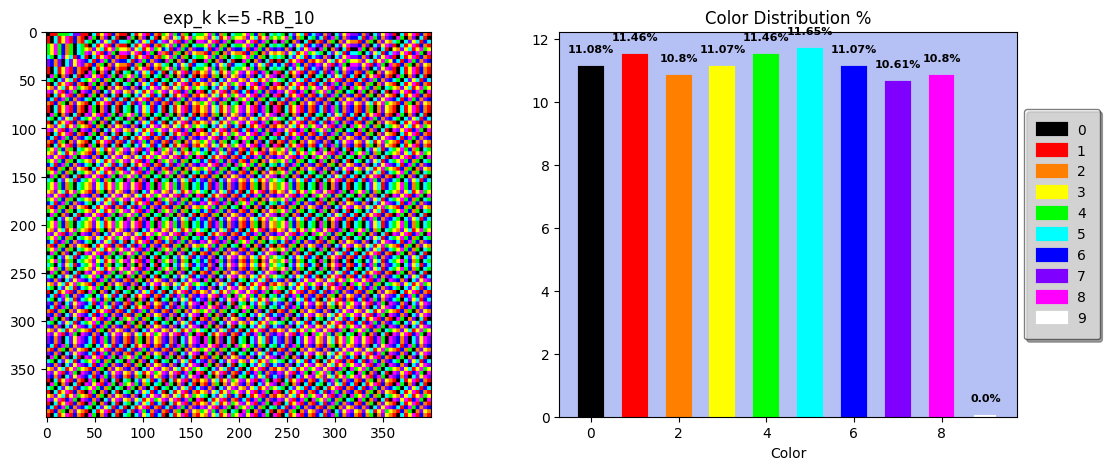

In [84]:
exp_5 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(5, )    # Argumentos de la funcion a
)

plot_info(exp_5, "exp_k k=5 -RB_10", (13, 5), default_colors)

n⁶

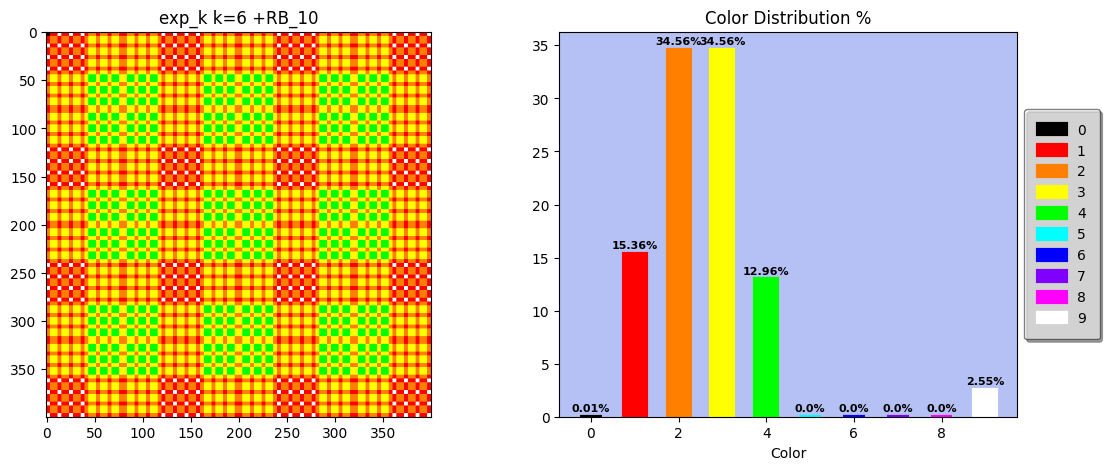

In [85]:
exp_6 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(6, )    # Argumentos de la funcion a
)

plot_info(exp_6, "exp_k k=6 +RB_10", (13, 5), default_colors)

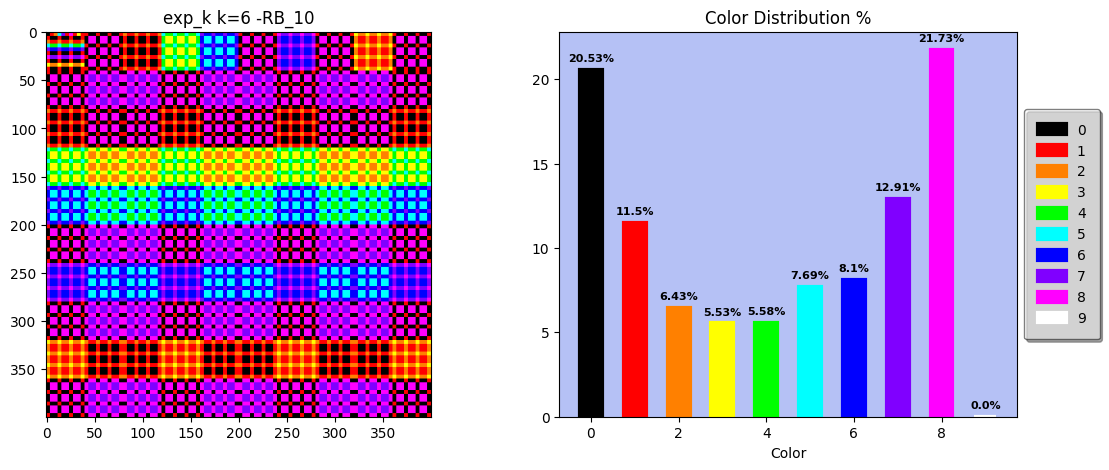

In [86]:
exp_6 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(6, )    # Argumentos de la funcion a
)

plot_info(exp_6, "exp_k k=6 -RB_10", (13, 5), default_colors)

n⁷

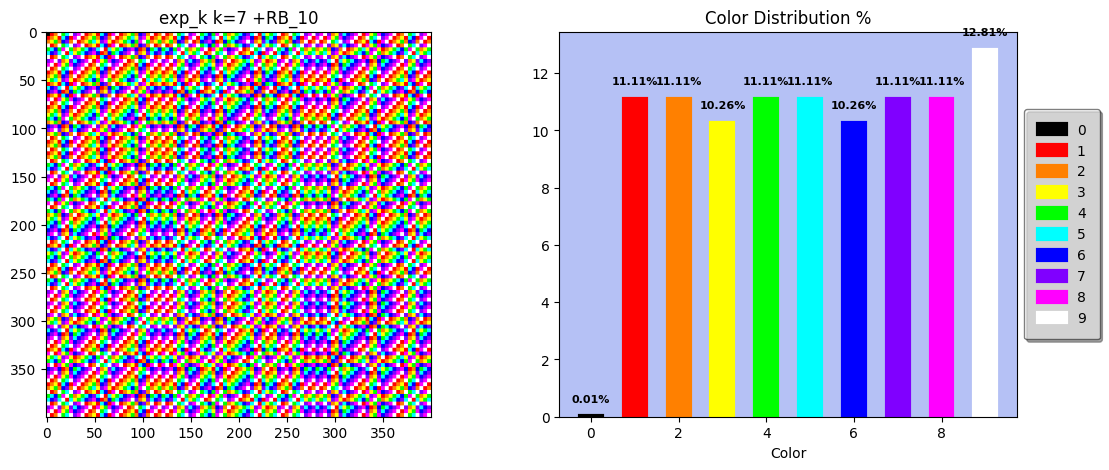

In [87]:
exp_7 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(7, )    # Argumentos de la funcion a
)

plot_info(exp_7, "exp_k k=7 +RB_10", (13, 5), default_colors)

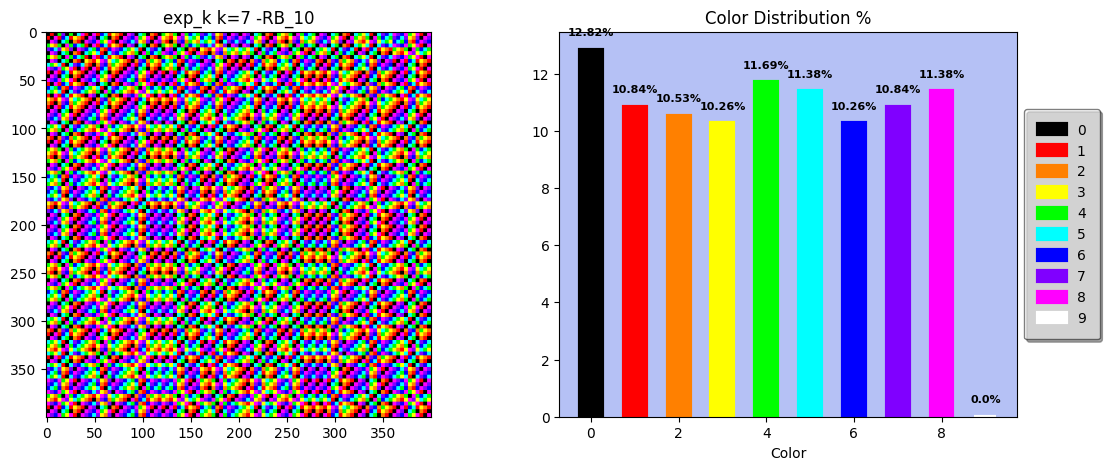

In [88]:
exp_7_less = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(7, )    # Argumentos de la funcion a
)

plot_info(exp_7_less, "exp_k k=7 -RB_10", (13, 5), default_colors)

n⁸

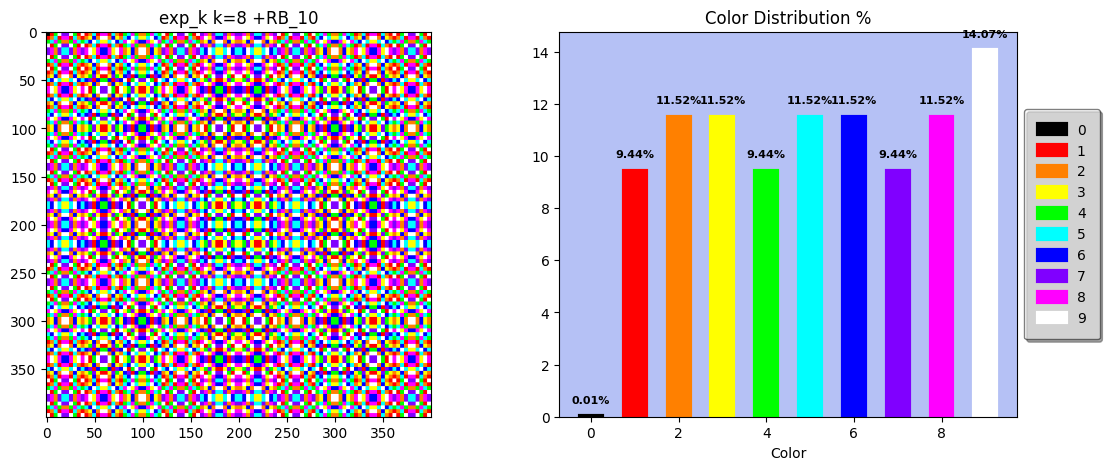

In [89]:
exp_8 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(8, )    # Argumentos de la funcion a
)

plot_info(exp_8, "exp_k k=8 +RB_10", (13, 5), default_colors)

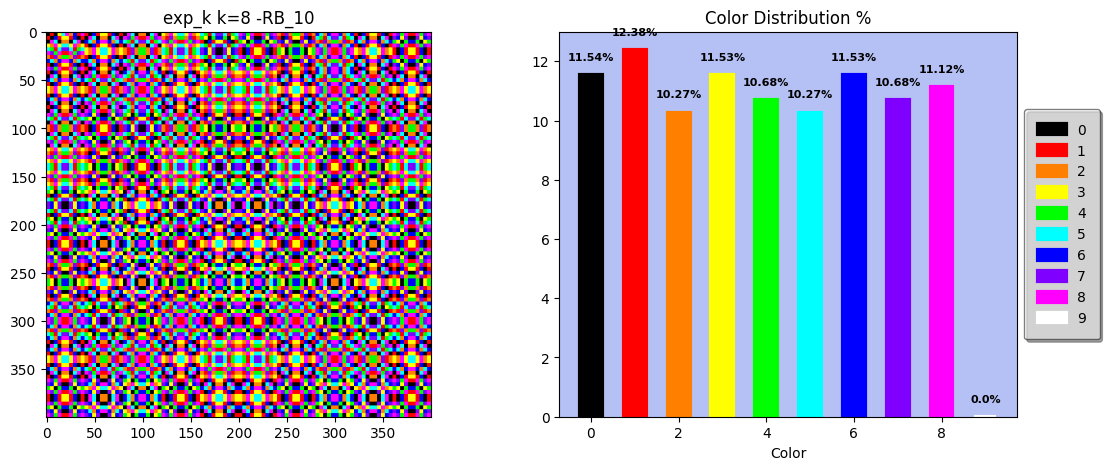

In [90]:
exp_8_less = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(8, )    # Argumentos de la funcion a
)

plot_info(exp_8_less, "exp_k k=8 -RB_10", (13, 5), default_colors)

n⁹

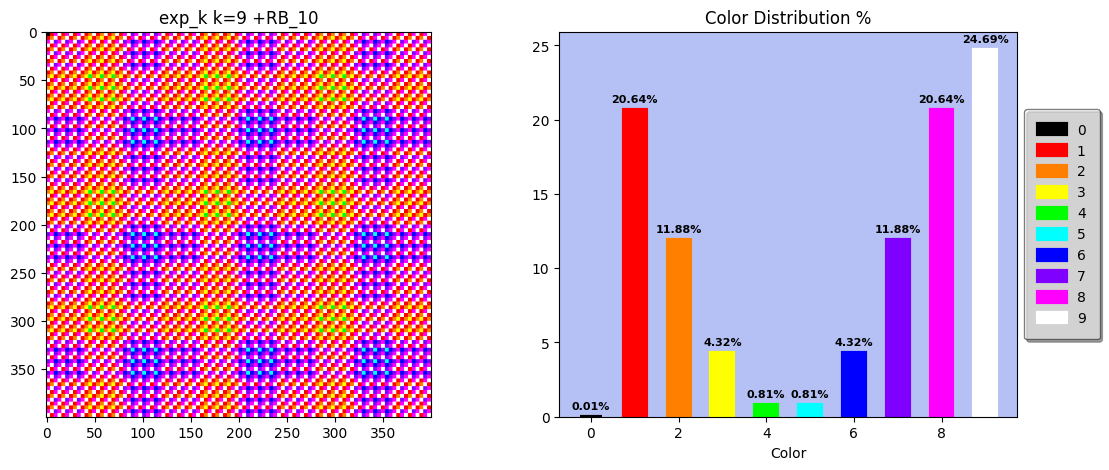

In [91]:
exp_9 = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(9, )    # Argumentos de la funcion a
)

plot_info(exp_9, "exp_k k=9 +RB_10", (13, 5), default_colors)

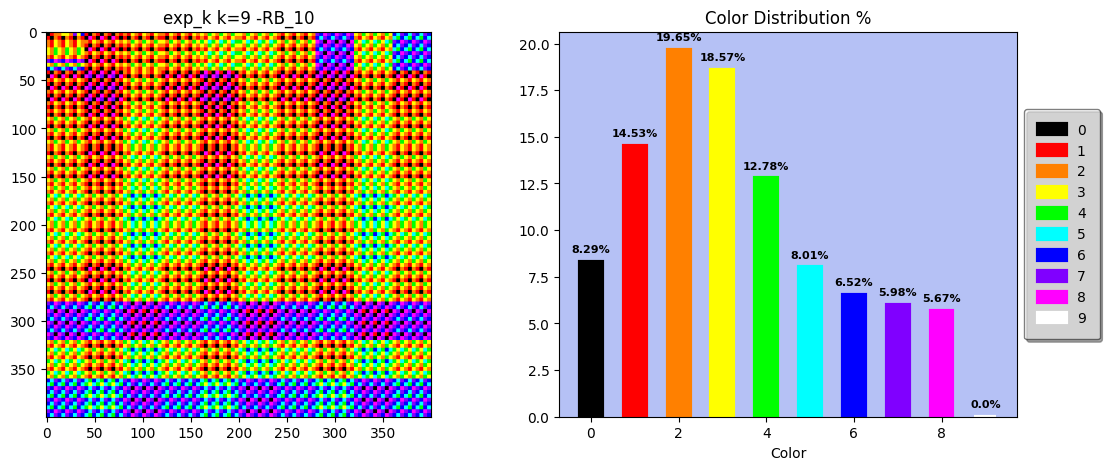

In [92]:
exp_9_less = gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(9, )    # Argumentos de la funcion a
)

plot_info(exp_9_less, "exp_k k=9 -RB_10", (13, 5), default_colors)

## Sucesion de n_primo

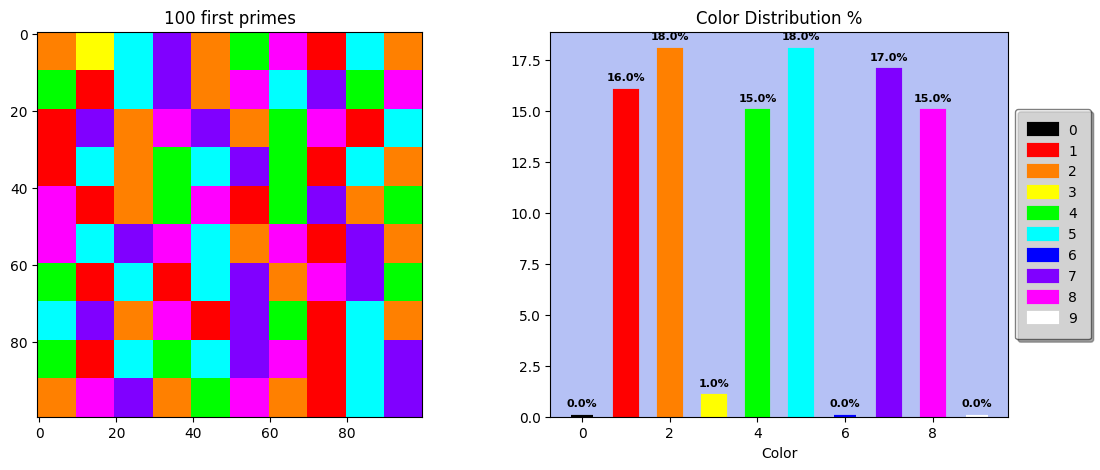

In [125]:
first_100 = gen_supermatrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    1,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    1, 1,           # Ancho y alto de la matriz de clusters
    10,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

plot_info(first_100, "100 first primes", (13, 5), default_colors)

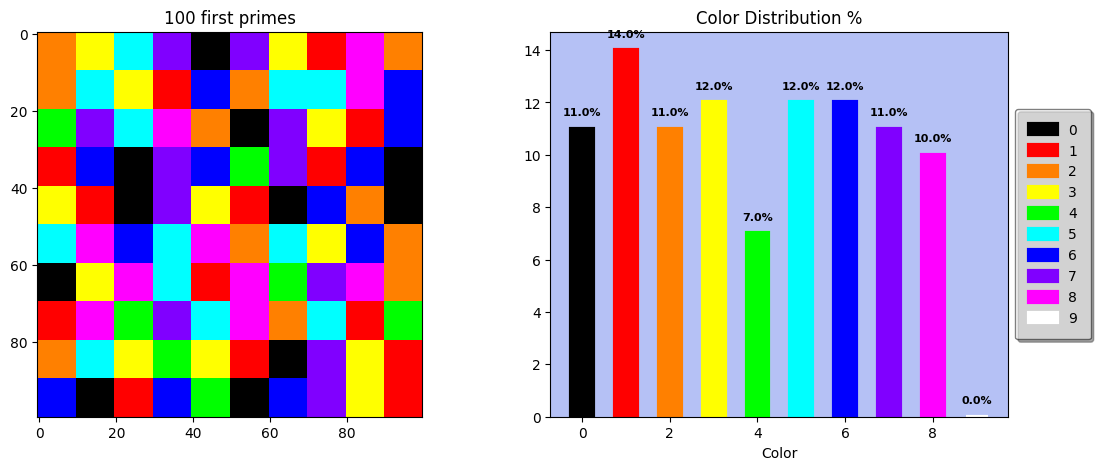

In [126]:
first_100_primes_less = gen_supermatrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    1,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    1, 1,           # Ancho y alto de la matriz de clusters
    10,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

plot_info(first_100_primes_less, "100 first primes", (13, 5), default_colors)

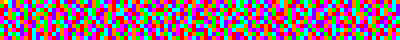

In [142]:
gen_supermatrix_image(
    n_primo,         # Funcion que calcula los numeros de la sucesion
    0,               # Termino inicial de la sucesion
    10, 10,          # Ancho y alto del cluster
    10, 1,           # Ancho y alto de la matriz de clusters
    4,               # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color  # Funcion que asigna un color a cada numero
)

Vista de los numeros primos en forma de supermatriz 10x10

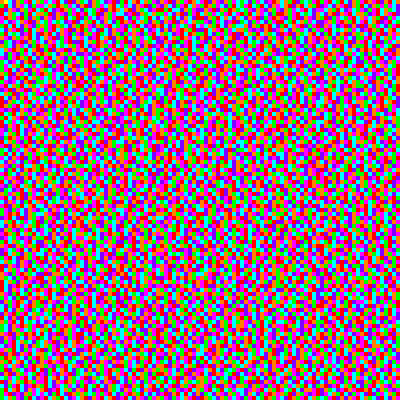

In [143]:
gen_supermatrix_image(
    n_primo,        # Funcion que calcula los numeros de la sucesion
    "+",            # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

Vista de los numeros primos como una matriz de 100x100

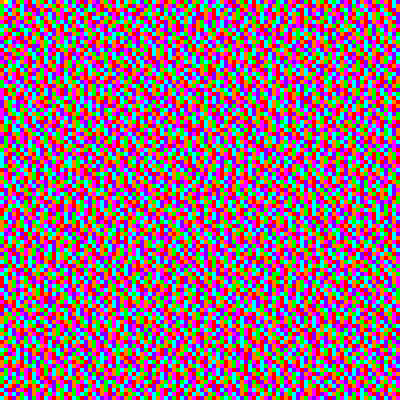

In [84]:
gen_supermatrix_image(
    n_primo,        # Funcion que calcula los numeros de la sucesion
    "+",            # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    100, 100,         # Ancho y alto del cluster
    1, 1,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

## Sucesion de fibonacci

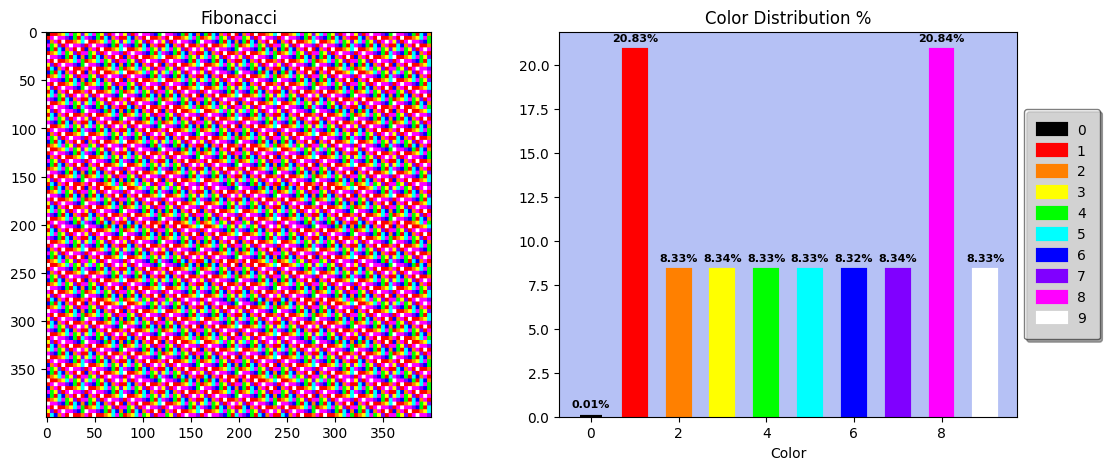

In [131]:
fibonacci_ = gen_supermatrix_image(
    dataset_fibonacci,
    "+",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

plot_info(fibonacci_, "Fibonacci", (13, 5), default_colors)

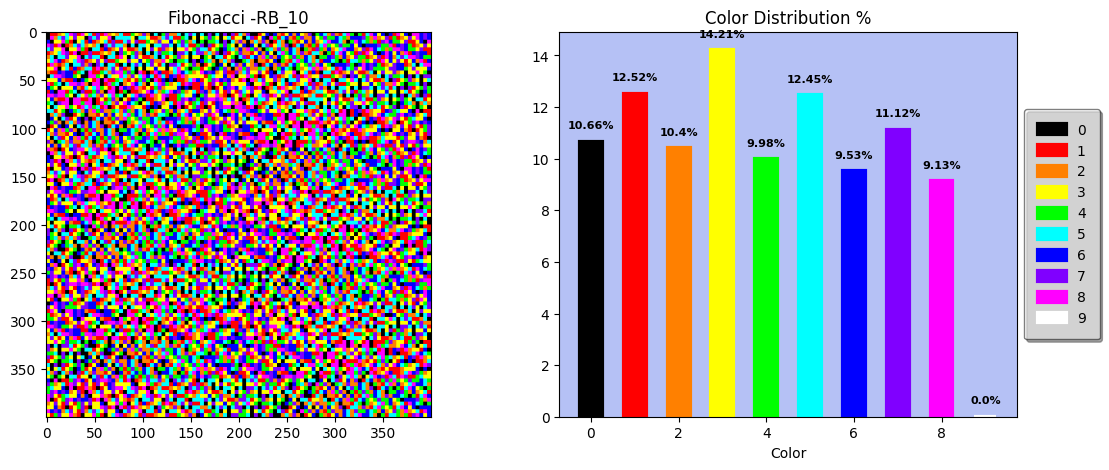

In [132]:
fibonacci_less = gen_supermatrix_image(
    dataset_fibonacci,
    "-",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

plot_info(fibonacci_less, "Fibonacci -RB_10", (13, 5), default_colors)

Fibonacci visto como una matriz de 1 cluster de 100x100

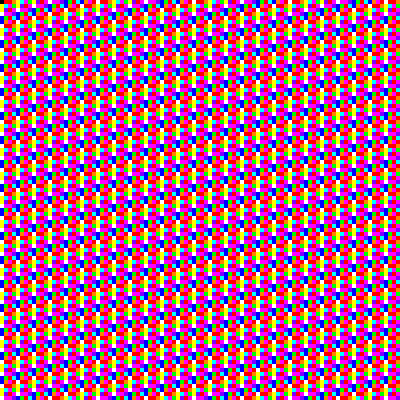

In [129]:
gen_supermatrix_image(
    fibonacci,
    "+",
    0,
    100, 100,
    1, 1,
    4,
    number_to_color
)

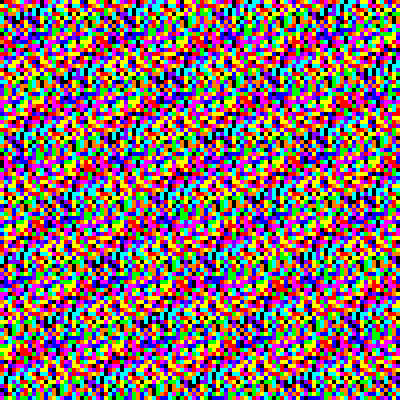

In [135]:
gen_supermatrix_image(
    dataset_fibonacci,
    "-",
    0,
    100, 100,
    1, 1,
    4,
    number_to_color
)

## Sucesion Pi_Euler (Custom)

In [137]:
import math

def pi_euler_n(n):
    return int(((math.pi)*(math.e))*n)

# Testeamos la funcion
print("pi_euler_n(0) = ", pi_euler_n(0))
print("pi_euler_n(1) = ", pi_euler_n(1))
print("pi_euler_n(2) = ", pi_euler_n(2))
print("pi_euler_n(3) = ", pi_euler_n(3))
print("pi_euler_n(4) = ", pi_euler_n(4))

pi_euler_n(0) =  0
pi_euler_n(1) =  8
pi_euler_n(2) =  17
pi_euler_n(3) =  25
pi_euler_n(4) =  34


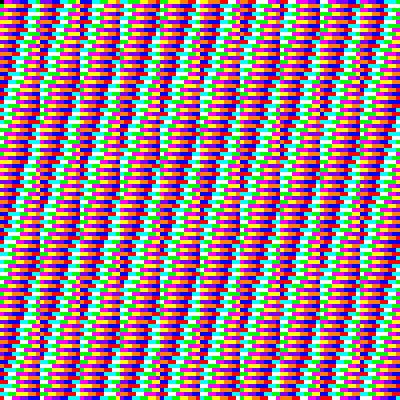

In [138]:
# Obtenemos la representacion de imagen de base
gen_supermatrix_image(
    pi_euler_n,
    "+",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

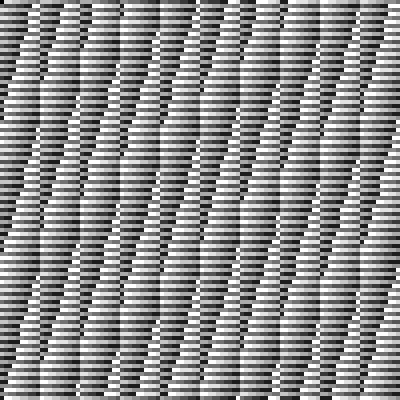

In [139]:
# Obtenemos la representacion de imagen de base
gen_supermatrix_image(
    pi_euler_n,
    "+",
    0,
    10, 10,
    10, 10,
    4,
    number_to_gray
)

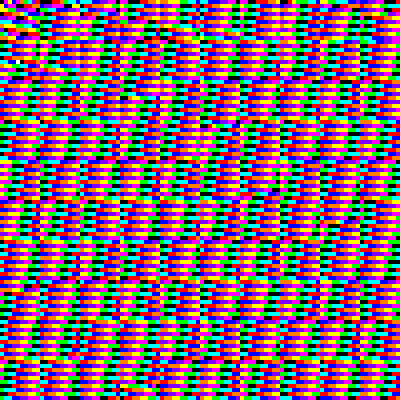

In [140]:
# Obtenemos la representacion de imagen de base
gen_supermatrix_image(
    pi_euler_n,
    "-",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

## PI 

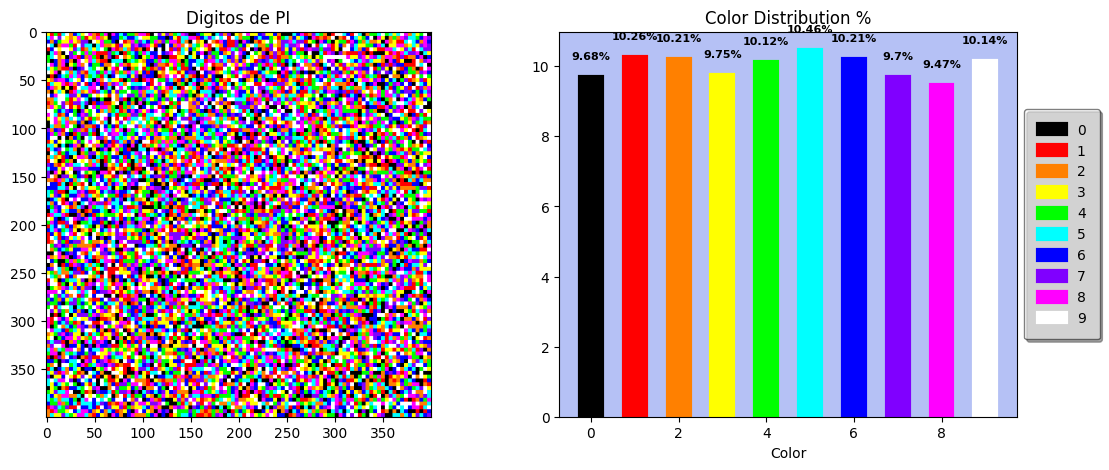

In [98]:
# Obtenemos la representacion de imagen de base
pi_ = gen_supermatrix_image(
    dataset_pi,
    "+",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

plot_info(pi_, "Digitos de PI", (13, 5), default_colors)

## PI concatenation sum

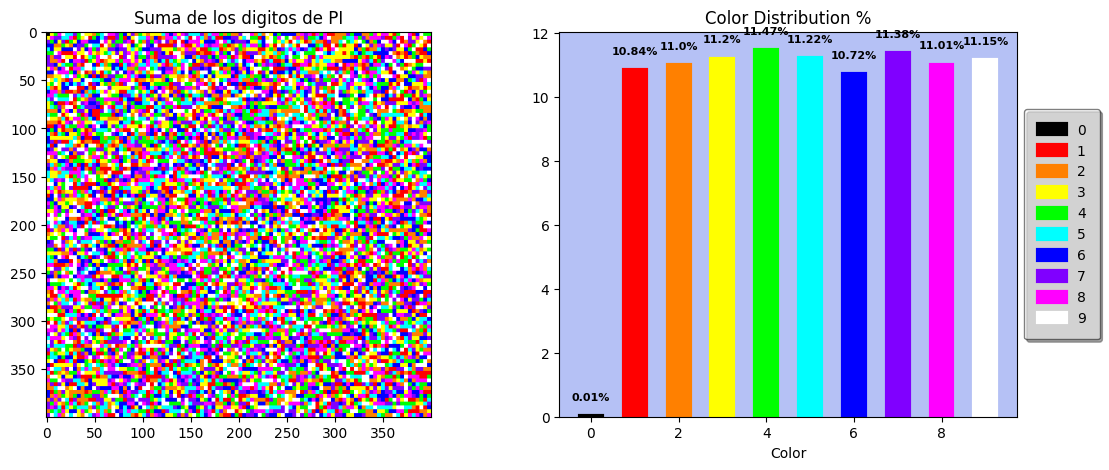

In [102]:
# Definimos la sucesion como la suma de los digitos de pi desde el digito 0 hasta n
def pi_sum(n):
    pi_n = 0
    for i in range(n):
        pi_n += int(dataset_pi(i))
    return pi_n

# Obtenemos la representacion de imagen de base
pi_sum = gen_supermatrix_image(
    pi_sum,
    "+",
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

plot_info(pi_sum, "Suma de los digitos de PI", (13, 5), default_colors)